# Data preparation

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
csvFile = r'..\data\global_inflation_data.csv'
df = pd.read_csv(csvFile)
dfT = pd.melt(df.drop(columns=['indicator_name']), id_vars='country_name', var_name='Year', value_name='Inflation')

In [19]:
print(dfT.dtypes)

country_name     object
Year             object
Inflation       float64
dtype: object


# Country inflation analysis

## Brazil inflation

In [20]:
dfBrazil = dfT[dfT['country_name'] == 'Brazil']
dfBrazil.head(10)

,country_name,Year,Inflation
24,Brazil,1980,90.2
220,Brazil,1981,101.7
416,Brazil,1982,100.6
612,Brazil,1983,135.0
808,Brazil,1984,192.1
1004,Brazil,1985,226.0
1200,Brazil,1986,147.1
1396,Brazil,1987,228.3
1592,Brazil,1988,629.1
1788,Brazil,1989,1430.7


In [15]:
dfBrazil[dfBrazil['Year'] == '1994']

,country_name,Year,Inflation
2768,Brazil,1994,2075.8


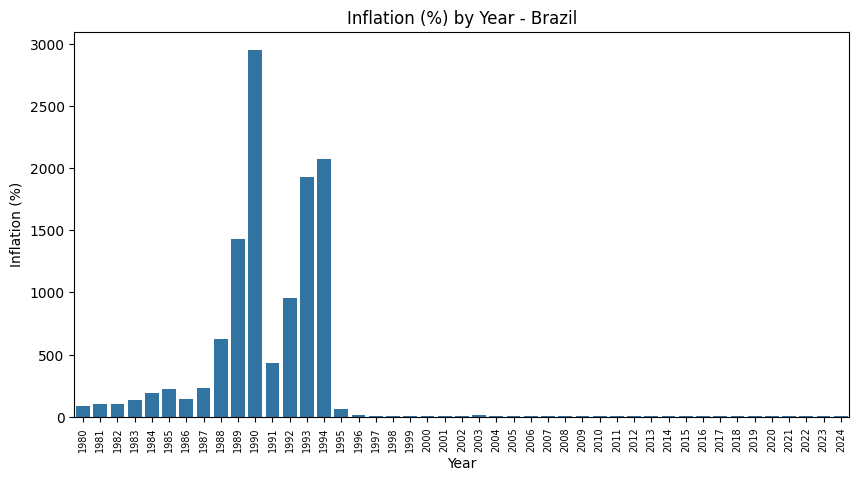

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x = "Year", y = "Inflation", data = dfBrazil)
plt.title("Inflation (%) by Year - Brazil", fontsize = 12)
plt.xticks(rotation=90, fontsize = 7)
ax.set_xlabel("Year")
ax.set_ylabel("Inflation (%)")

plt.show()

### Pontos importantes a serem considerados

Plano real teve início em primeiro de julho de 1994.  
A inflação em junho de 1994 chegou a 4.922% no acumulado de 12 meses.  
Para o efeito desse estudo será utilizado os dados de inflação a partir de 1996.

In [23]:
dfBrazil95 = dfBrazil[dfBrazil['Year'] > '1995']

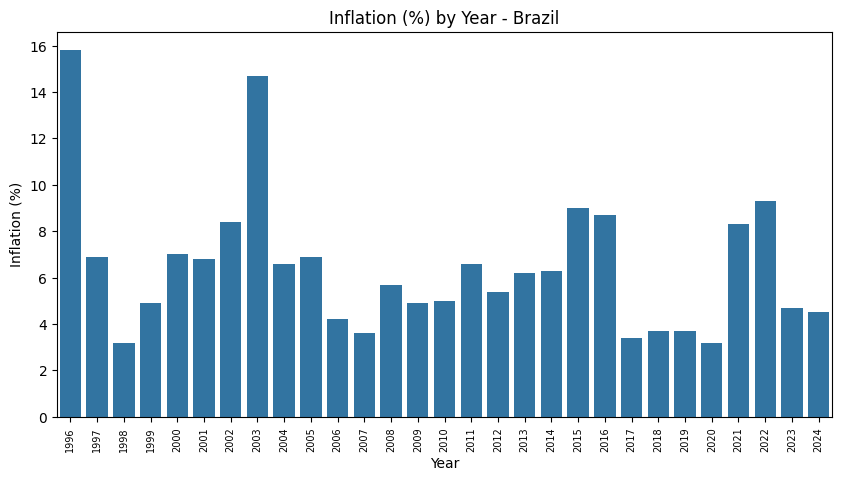

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x = "Year", y = "Inflation", data = dfBrazil95)
plt.title("Inflation (%) by Year - Brazil", fontsize = 12)
plt.xticks(rotation=90, fontsize = 7)
ax.set_xlabel("Year")
ax.set_ylabel("Inflation (%)")

plt.show()

# Currency for grouping

## Update Currency

In [56]:
currencies = {
    'IRR': ['Iran'],
    'XAF': ['Cameroon'],
    'XOF': ['Benin'],
    'JPY': ['Japan'],
    'RUB': ['Russia'],
    'INR': ['India'],
    'CNY': ['China'],
    'BRL': ['Brazil'],
    'ILS': ['Israel'],
    'XCD': ['Anguilla'],
    'USD': ['United States'],
    'AUD': ['Australia'],
    'NZD': ['New Zealand'],
    'EUR': ['France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Portugal'],
    'CHF': ['Switzerland'],
    'KWD': ['Kuwait']
}

currencyByCountry = {country: currency for currency, countries in currencies.items() for country in countries}

In [58]:
dfT['Currency'] = dfT['country_name'].map(currencyByCountry)

C:\Users\felip\AppData\Local\Temp\ipykernel_81312\405522462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfT['Currency'] = dfT['country_name'].map(currencyByCountry)


# Filter the dataset, excluding the period before 1996

In [59]:
dfT = dfT[dfT['Year'] > '1995']
dfT = dfT.dropna(subset=['Currency'])

In [60]:
dfT

,country_name,Year,Inflation,Currency
3145,Australia,1996,2.7,AUD
3155,Benin,1996,4.9,XOF
3160,Brazil,1996,15.8,BRL
3167,Cameroon,1996,3.9,XAF
3196,France,1996,2.1,EUR
...,...,...,...,...
8716,Kuwait,2024,3.1,KWD
8748,New Zealand,2024,2.7,NZD
8763,Portugal,2024,3.4,EUR
8791,Switzerland,2024,2.0,CHF


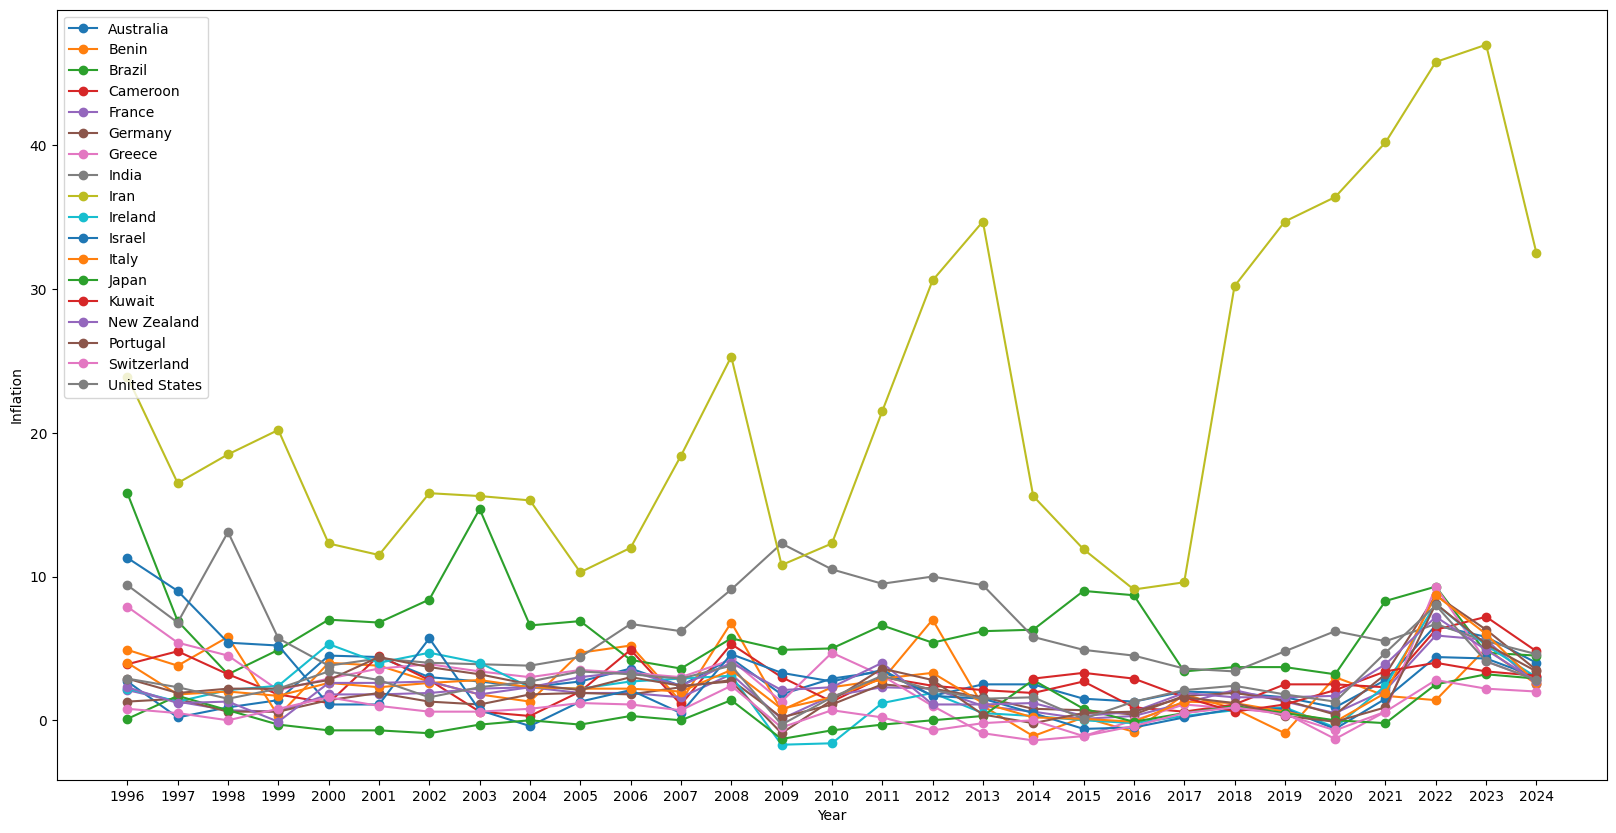

In [67]:
countriesPlot = dfT['country_name'].unique()

fig, ax = plt.subplots(figsize=(20,10))
for country in countriesPlot:
    countryData = dfT[dfT['country_name'] == country]
    plt.plot(countryData['Year'], countryData['Inflation'], label=country, marker='o')

plt.xlabel('Year')
plt.ylabel('Inflation')

plt.legend(loc='upper left')

plt.show()